### **Statistic Week ( Python ka Chilla 1.0 )**

- Terms of statistics:
  
  - AVERAGE
  - MAXIMUM
  - MINIMUM
  - PERCENTAGE
  - LIKELIHOOD
  - VARIENCE
  - T-TEST
  - ANOVA

- Types of Data:
  
  - CROSS SECTIONAL
    - Data collected at one point
    - e.g: how many people have watched a video today
  - TIME SERIES
    - Data collected at different points
    - e.g: how many people have watched a video since 2021 to 2023
  - UNIVARIATE
    - Data contains a single variable to measure entity
    - e.g: if you are eating food how much your weight is increasing
  - MULTI-VARIATE
    - Data contains > 2 variables to measure something
    - e.g: if you are eating food and also drinking water how much your weight is increasing

- Types of Variable:
  - Categorical (Nominal) Variable :
    - Binomial
      - True/False
    - Multinomial
      - Multiple Choices
    - Ordinal
      - Data ranked or ordered
  - Continuous Variable :
    - Ratio Data
      - we compare with ratio
      - Data have natural zero
    - Interval Variables
      - ordered and characterized data

# Exploratory Data Analysis

-   Three important steps to keep in mind
    -   Understand the data
    -   Clean the data
    -   Find a relationship between data

In [100]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
ks = pd.read_csv('./kashit.csv')

In [102]:
ks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  deck         203 non-null    object 
 13  embark_town  889 non-null    object 
 14  alive        891 non-null    object 
 15  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [103]:
ks.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [104]:
# this will give us the number of (rows, columns)
ks.shape

(891, 16)

In [105]:
# to check unique values
ks.nunique()

Unnamed: 0     891
survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [106]:
# to check column names
ks.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [107]:
# to check unique values in a particular column
ks['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [108]:
# 12:43 assignment (solution)
# how to get unique values of more than 1 column 
pd.unique(ks[['who','sex']].values.ravel())

array(['man', 'male', 'woman', 'female', 'child'], dtype=object)

# Cleaning and filtering the data

In [109]:
# find the missing values inside
ks.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [110]:
# as 'deck' column has the most missing values so we drop/remove the whole column (cleaning data step1)
kashti_cleandata = ks.drop(columns=['deck'])
kashti_cleandata.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [111]:
kashti_cleandata.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [112]:
kashti_cleandata.shape

(891, 15)

In [113]:
# we drop the remaining null value rows and update our variable (cleaning data step2)
kashti_cleandata = kashti_cleandata.dropna()
kashti_cleandata

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [114]:
kashti_cleandata.isnull().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [115]:
kashti_cleandata['who'].value_counts()

man      413
woman    216
child     83
Name: who, dtype: int64

### Comparing before and after cleaning data

In [116]:
# before cleaning
ks.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [117]:
# after cleaning
kashti_cleandata.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,447.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,444.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,676.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,890.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [118]:
kashti_cleandata.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<AxesSubplot: xlabel='sex', ylabel='age'>

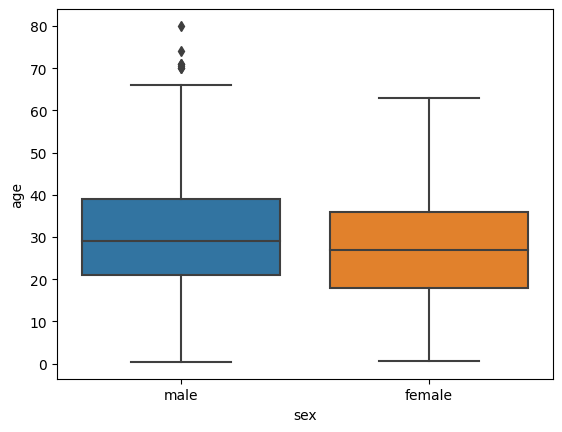

In [119]:
sns.boxplot(x='sex', y='age', data=kashti_cleandata)

<AxesSubplot: ylabel='age'>

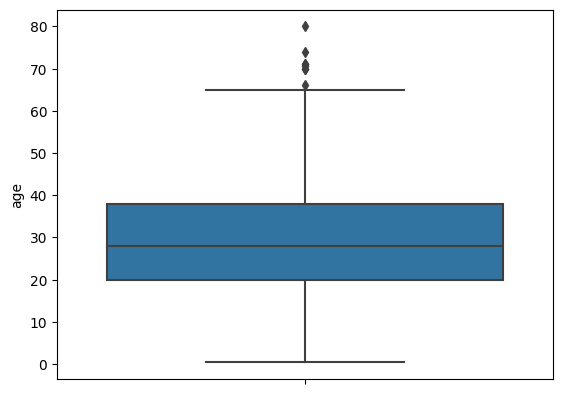

In [120]:
sns.boxplot(y='age', data=kashti_cleandata)

C:\Users\stech\AppData\Local\Temp\ipykernel_7616\419613453.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kashti_cleandata['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

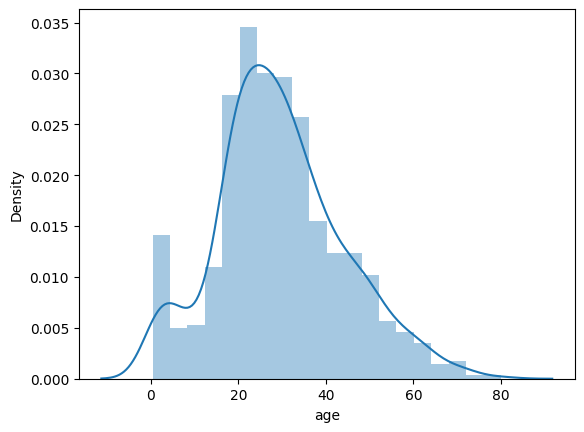

In [121]:
sns.distplot(kashti_cleandata['age'])

In [122]:
kashti_cleandata['age'].mean()

29.64209269662921

### how to remove outliers of a graph

In [123]:
# below method will convert the column into boolean values
# kashti_cleandata['age'] =  kashti_cleandata['age'] < 68
# kashti_cleandata['age'].mean()

In [124]:
kashti_cleandata.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [125]:
kashti_cleandata = kashti_cleandata[kashti_cleandata['age'] < 68]

In [126]:
kashti_cleandata.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [127]:
# we have cleaned the rows that contained (age > 68)
kashti_cleandata.shape

(705, 15)

<AxesSubplot: ylabel='age'>

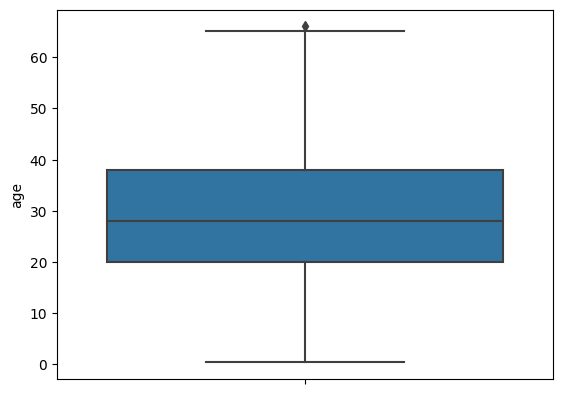

In [128]:
# outliers are removed in below graph
sns.boxplot(y='age', data=kashti_cleandata)

In [135]:
kashti_cleandata.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [137]:
kashti_cleandata.shape

(705, 14)

<AxesSubplot: >

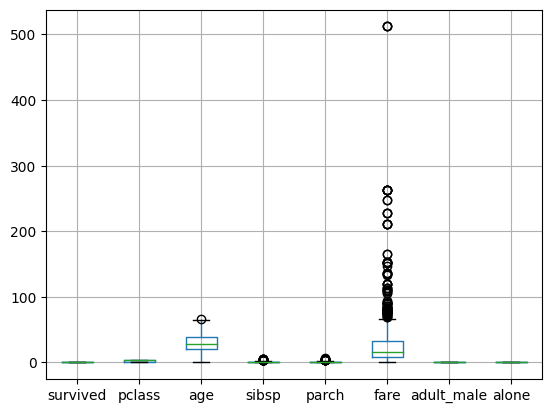

In [140]:
kashti_cleandata.boxplot()

<AxesSubplot: >

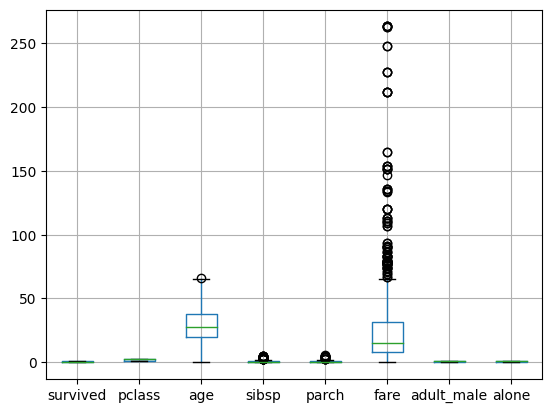

In [141]:
# we see that only single person has fare 500 so we can remove the unwanted fare
kashti_cleandata = kashti_cleandata[kashti_cleandata['fare'] < 300]
kashti_cleandata.boxplot()

C:\Users\stech\AppData\Local\Temp\ipykernel_7616\627674962.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kashti_cleandata['fare'])


<AxesSubplot: xlabel='fare', ylabel='Density'>

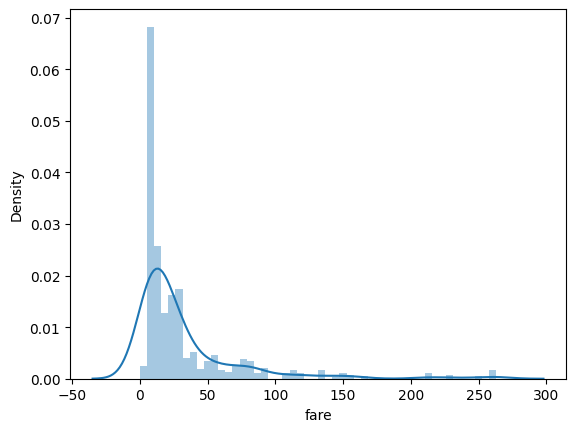

In [142]:
sns.distplot(kashti_cleandata['fare'])

- dispersion of the fare parameter is alot and we can actually handle it

In [165]:
# log transformation
kashti_cleandata['fare_log'] = np.log(kashti_cleandata['fare'])
kashti_cleandata.head()

c:\Users\stech\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,fare_log
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,1.981001
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,4.266662
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,2.070022
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,3.972177
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,2.085672


### Difference between fare and fare_log boxplot

<AxesSubplot: ylabel='fare'>

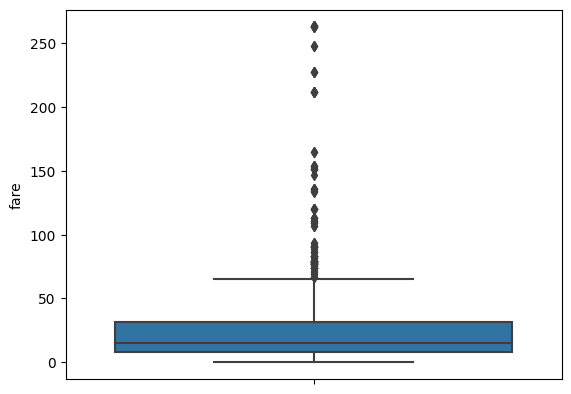

In [169]:
sns.boxplot(y='fare', data=kashti_cleandata)

<AxesSubplot: ylabel='fare_log'>

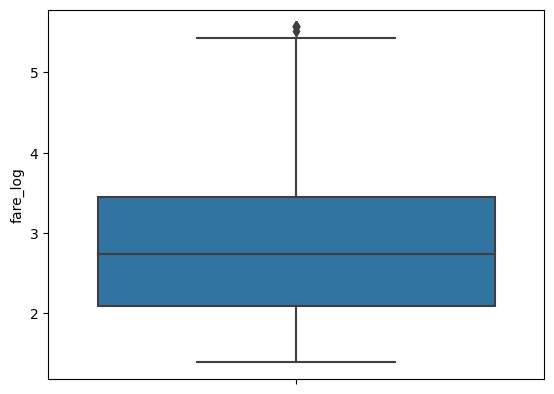

In [170]:
sns.boxplot(y='fare_log', data=kashti_cleandata)

<AxesSubplot: >

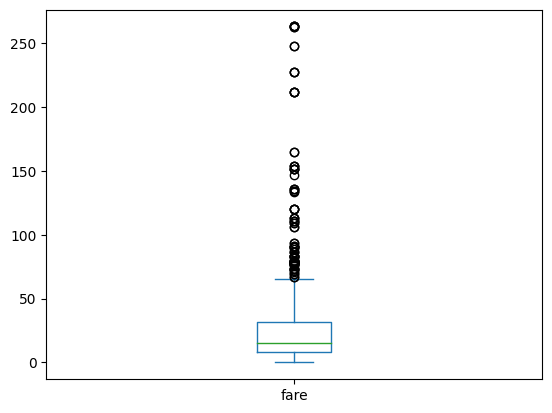

In [166]:
kashti_cleandata['fare'].plot.box()

<AxesSubplot: >

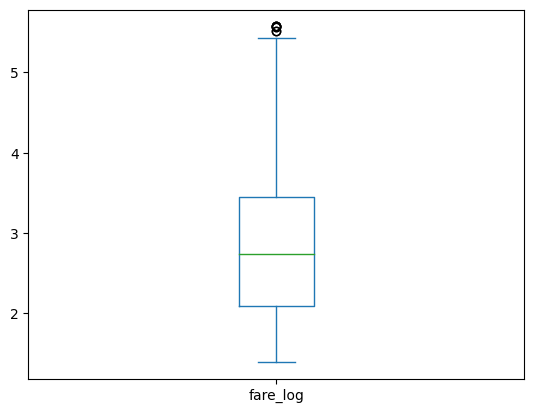

In [167]:
kashti_cleandata['fare_log'].plot.box()

array([[<AxesSubplot: title={'center': 'survived'}>,
        <AxesSubplot: title={'center': 'pclass'}>],
       [<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'sibsp'}>],
       [<AxesSubplot: title={'center': 'parch'}>,
        <AxesSubplot: title={'center': 'fare'}>]], dtype=object)

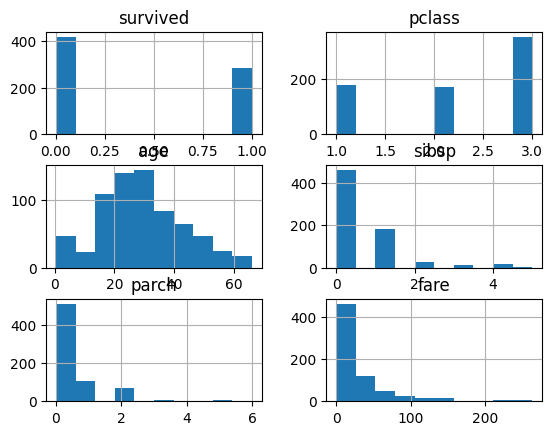

In [143]:
kashti_cleandata.hist()

<AxesSubplot: >

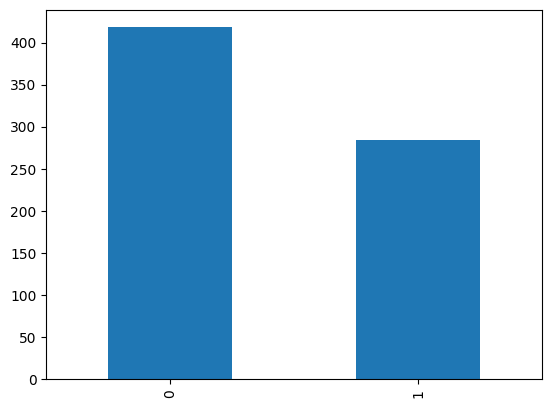

In [148]:
# using pandas how we can create plot of single column
pd.value_counts(kashti_cleandata['survived']).plot.bar()

<AxesSubplot: >

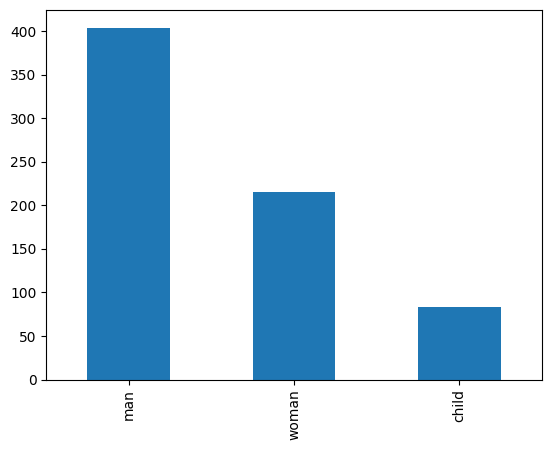

In [149]:
pd.value_counts(kashti_cleandata['who']).plot.bar()

In [152]:
kashti_cleandata.groupby(['sex', 'class']).mean()

C:\Users\stech\AppData\Local\Temp\ipykernel_7616\4198421734.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kashti_cleandata.groupby(['sex', 'class']).mean()


survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.963415     1.0  34.231707  0.560976  0.512195  103.696393   
       Second  0.918919     2.0  28.722973  0.500000  0.621622   21.951070   
       Third   0.460784     3.0  21.750000  0.823529  0.950980   15.875369   
male   First   0.389474     1.0  40.067579  0.389474  0.336842   62.901096   
       Second  0.153061     2.0  30.340102  0.377551  0.244898   21.221429   
       Third   0.151394     3.0  26.143108  0.494024  0.258964   12.197757   

               adult_male     alone  
sex    class                         
female First     0.000000  0.353659  
       Second    0.000000  0.405405  
       Third     0.000000  0.372549  
male   First     0.968421  0.526316  
       Second    0.908163  0.632653  
       Third     0.888446  0.737052

C:\Users\stech\AppData\Local\Temp\ipykernel_7616\490443268.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  kashti_cleandata.groupby(['sex', 'class']).mean().plot.bar()


<AxesSubplot: xlabel='sex,class'>

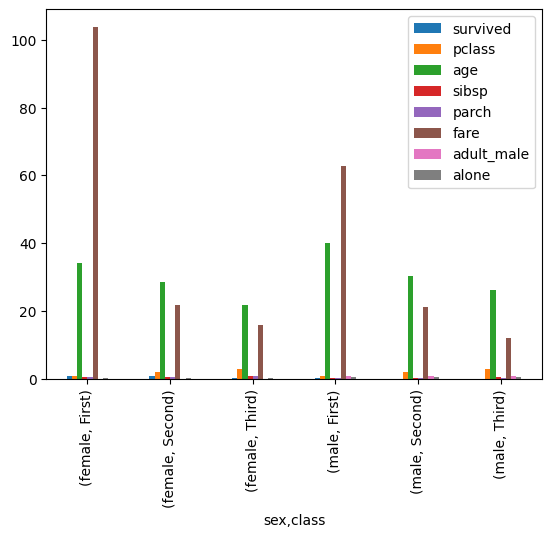

In [151]:
kashti_cleandata.groupby(['sex', 'class']).mean().plot.bar()

# Relationship between data

In [154]:
# to check co relation
corr = kashti_cleandata.corr()
corr

C:\Users\stech\AppData\Local\Temp\ipykernel_7616\2183662708.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = kashti_cleandata.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.356549,-0.074335,-0.014483,0.095426,0.273531,-0.554567,-0.201175
pclass,-0.356549,1.000000,-0.365121,0.061354,0.022519,-0.617591,0.102930,0.156030
age,-0.074335,-0.365121,1.000000,-0.308906,-0.186271,0.103100,0.275035,0.187284
sibsp,-0.014483,0.061354,-0.308906,1.000000,0.381803,0.197954,-0.311622,-0.629200
parch,0.095426,0.022519,-0.186271,0.381803,1.000000,0.259948,-0.366540,-0.574701
fare,0.273531,-0.617591,0.103100,0.197954,0.259948,1.000000,-0.228675,-0.333949
adult_male,-0.554567,0.102930,0.275035,-0.311622,-0.366540,-0.228675,1.000000,0.402214
alone,-0.201175,0.156030,0.187284,-0.629200,-0.574701,-0.333949,0.402214,1.000000


<AxesSubplot: >

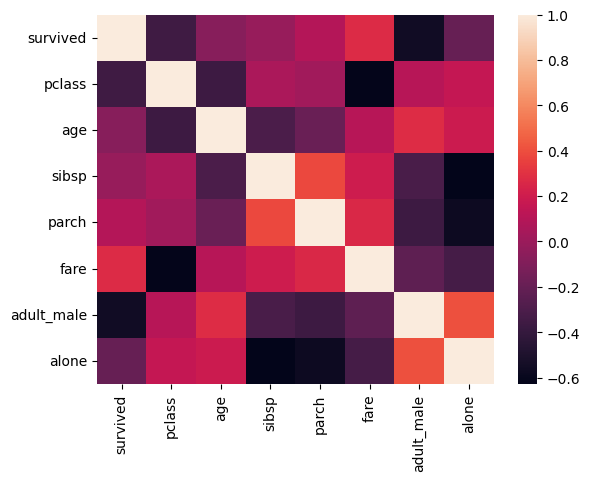

In [155]:
# heatmap graph of co relation
sns.heatmap(corr)

<AxesSubplot: >

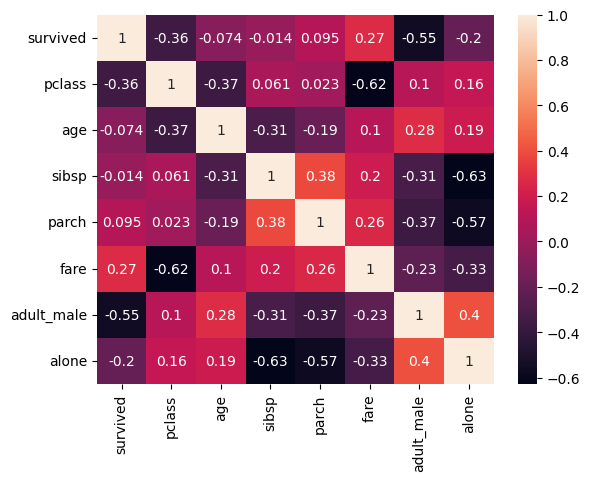

In [158]:
# if you want to see values 
sns.heatmap(corr, annot=True)

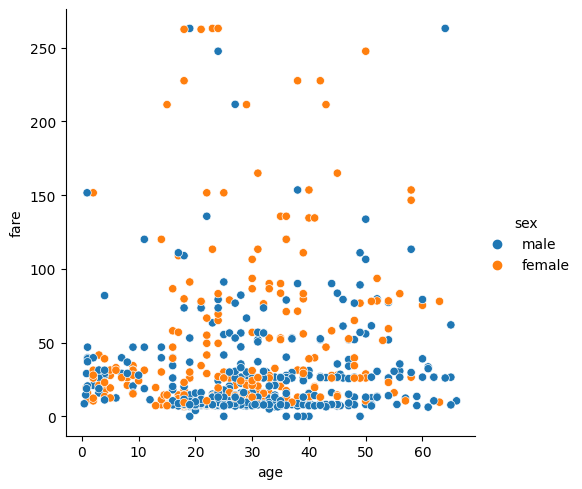

In [159]:
sns.relplot(x='age', y='fare', hue='sex', data=kashti_cleandata)

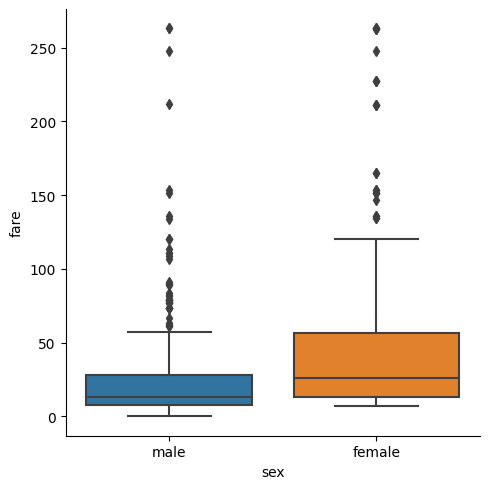

In [172]:
sns.catplot(x='sex', y='fare', data=kashti_cleandata, kind='box')

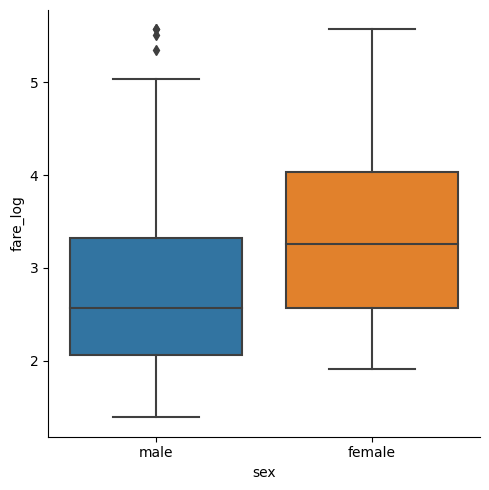

In [174]:
sns.catplot(x='sex', y='fare_log', data=kashti_cleandata, kind='box')